In [1]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 12s 7ms/step - loss: 0.3132 - val_loss: 0.1399
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1357 - val_loss: 0.1219
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1205 - val_loss: 0.1131
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1129 - val_loss: 0.1088
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1093 - val_loss: 0.1057
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1063 - val_loss: 0.1032
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1040 - val_loss: 0.1027
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1026 - val_loss: 0.1004
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1011 - val_loss: 0.0995
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1000 - val_loss: 0.098

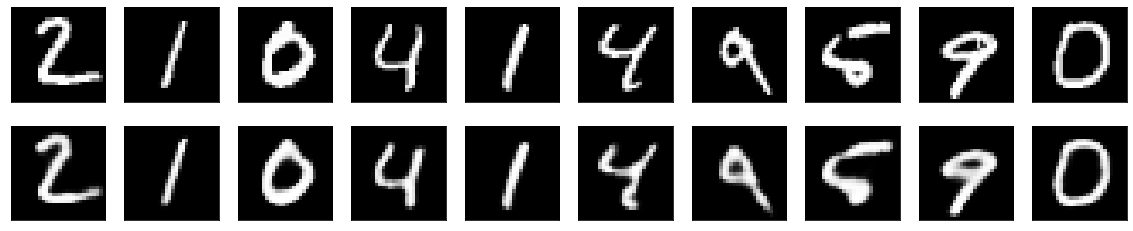

In [5]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

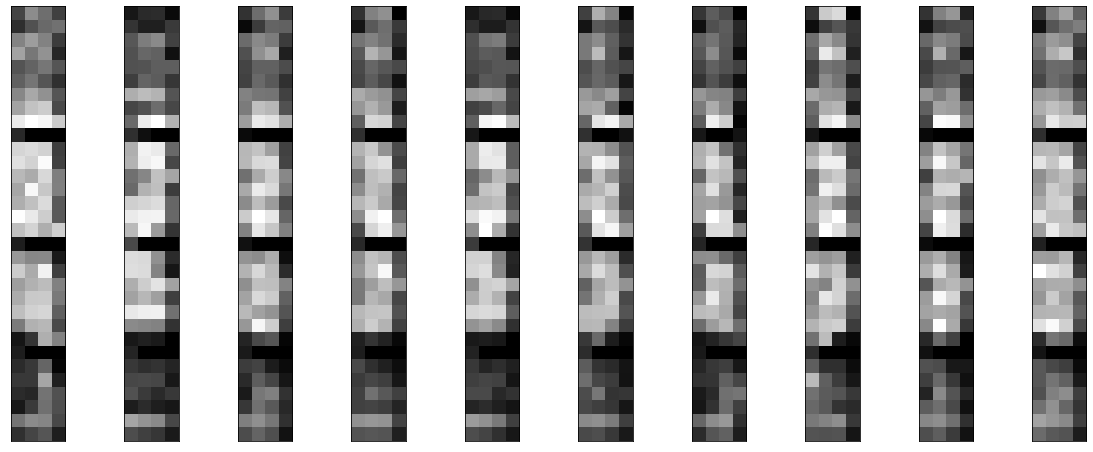

In [6]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

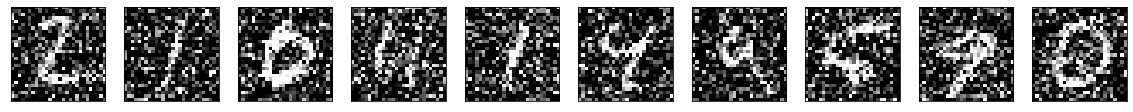

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.2492 - val_loss: 0.1141
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1133 - val_loss: 0.1073
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1076 - val_loss: 0.1045
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1049 - val_loss: 0.1024
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1031 - val_loss: 0.1007
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1013 - val_loss: 0.0997
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0991 - val_loss: 0.0981
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0986 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0980 - val_lo

Epoch 81/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0932 - val_loss: 0.0933
Epoch 82/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0931 - val_loss: 0.0933
Epoch 83/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0932 - val_loss: 0.0932
Epoch 84/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0932 - val_loss: 0.0938
Epoch 85/100
469/469 [==============================] - 9s 20ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 86/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0933 - val_loss: 0.0935
Epoch 87/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0933 - val_loss: 0.0934
Epoch 88/100
469/469 [==============================] - 10s 20ms/step - loss: 0.0932 - val_loss: 0.0932
Epoch 89/100
469/469 [==============================] - 10s 22ms/step - loss: 0.0929 - val_loss: 0.0933
Epoch 90/100
469/469 [==============================] - 11s 23ms/step

In [17]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [18]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [19]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [20]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=25,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/25
1875/1875 [==============================] - 14s 7ms/step - loss: 220.3478 - val_loss: 167.1373
Epoch 2/25
1875/1875 [==============================] - 15s 8ms/step - loss: 165.4982 - val_loss: 162.9110
Epoch 3/25
1875/1875 [==============================] - 16s 8ms/step - loss: 162.1860 - val_loss: 160.6336
Epoch 4/25
1875/1875 [==============================] - 16s 8ms/step - loss: 160.1045 - val_loss: 158.8001
Epoch 5/25
1875/1875 [==============================] - 15s 8ms/step - loss: 158.1701 - val_loss: 156.9087
Epoch 6/25
1875/1875 [==============================] - 15s 8ms/step - loss: 156.2696 - val_loss: 155.5455
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 154.6685 - val_loss: 154.6599
Epoch 8/25
1875/1875 [==============================] - 16s 8ms/step - loss: 153.6012 - val_loss: 153.9463
Epoch 9/25
1875/1875 [==============================] - 15s 8ms/step - loss: 153.2072 - val_loss: 153.2085
Epoch 10/25
1875/1875 [==============

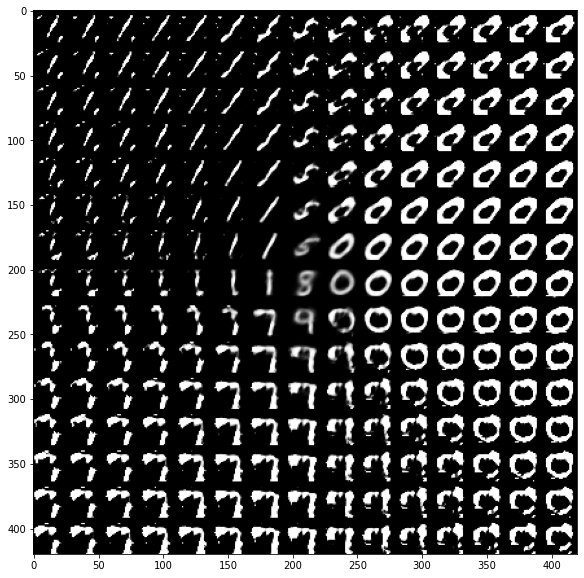

In [24]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()